<a href="https://colab.research.google.com/github/dtabuena/Workshop/blob/main/Image/Soma_Size/Cell_pose_AR_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install cellpose --quiet
!pip install scikit-image --quiet
!pip install matplotlib --quiet


In [2]:
from cellpose import models
import pandas as pd

In [287]:
def plot_point_data_pcol(x,y,z,image_stack,vmin=None,vmax=None,lw=.2,figsize=(3,2.7),rad=None,cmap='viridis'):
    """ Assume 'zxyc' format"""

    if rad is not None:
        min_x = np.max([x-rad,0])
        max_x = np.min([x+rad,image_stack.shape[1]])
        min_y = np.max([y-rad,0])
        max_y = np.min([y+rad,image_stack.shape[2]])
        image_stack = image_stack[:,min_y:max_y,min_x:max_x]
        x=rad
        y=rad

    xy_slice = image_stack[z,:,:]
    zy_slice = image_stack[:,:,x].transpose([1,0])
    zx_slice = image_stack[:,y,:]

    vmin = np.percentile(image_stack,.1)
    vmax = np.percentile(image_stack,99.9)
    print(vmin,vmax)

    fig,ax=plt.subplots(2,3,width_ratios=[5, 1, .5],height_ratios=(5,1),figsize=figsize,dpi=300)
    ax=ax.flatten()
    # ,aspect='auto'
    cbh=ax[0].pcolorfast(xy_slice,zorder=-1, vmin=vmin, vmax=vmax, cmap=cmap) # cmap=cmap,
    ax[0].axvline(x,color='m',linewidth=lw)
    ax[0].axhline(y,color='c',linewidth=lw)
    ax[0].set_xticks([])
    ax[0].invert_yaxis()

    ax[1].imshow(zy_slice,aspect='auto',zorder=-1, vmin=vmin, vmax=vmax, cmap=cmap) # ,vmin=vmin,vmax=vmax,cmap=cmap,
    ax[1].axhline(y,color='c',linewidth=lw)
    ax[1].axvline(z,color='y',linewidth=lw)
    ax[1].set_yticks([])
    ax[1].set_xticks([])

    ax[3].imshow(zx_slice,aspect='auto',zorder=-1, vmin=vmin, vmax=vmax, cmap=cmap) # ,vmin=vmin,vmax=vmax,cmap=cmap,
    ax[3].axvline(x,color='m',linewidth=lw)
    ax[3].axhline(z,color='y',linewidth=lw)

    plt.colorbar(cbh,cax=ax[2])

    for a in ax[4:]:
        a.axis('off')
    plt.tight_layout()
    return fig,ax,cbh

In [127]:
def plot_point_data_rgb(x,y,z,image_stack,vmin=None,vmax=None,lw=.2,figsize=(3,2.7),rad=None):
    """ Assume 'zxyc' format"""

    if rad is not None:
        min_x = np.max([x-rad,0])
        max_x = np.min([x+rad,image_stack.shape[1]])
        min_y = np.max([y-rad,0])
        max_y = np.min([y+rad,image_stack.shape[2]])
        image_stack = image_stack[:,min_y:max_y,min_x:max_x,:]
        x=rad
        y=rad

    print(image_stack.shape,x,y)

    xy_slice = image_stack[z,:,:,:]
    zy_slice = image_stack[:,:,x,:].transpose([1,0,2])
    zx_slice = image_stack[:,y,:,:]


    z_ratio = image_stack.shape[0]/image_stack.shape[1]

    fig,ax=plt.subplots(2,2,width_ratios=[1, z_ratio],height_ratios=(1,z_ratio),figsize=figsize,dpi=300)
    ax=ax.flatten()

    ax[0].imshow(xy_slice,aspect='auto',zorder=-1) # vmin=vmin,vmax=vmax,cmap=cmap,
    ax[0].axvline(x,color='m',linewidth=lw)
    ax[0].axhline(y,color='c',linewidth=lw)
    ax[0].set_xticks([])

    ax[1].imshow(zy_slice,aspect='auto',zorder=-1) # ,vmin=vmin,vmax=vmax,cmap=cmap,
    ax[1].axhline(y,color='c',linewidth=lw)
    ax[1].axvline(z,color='y',linewidth=lw)
    ax[1].set_yticks([])
    ax[1].set_xticks([])

    ax[2].imshow(zx_slice,aspect='auto',zorder=-1) # ,vmin=vmin,vmax=vmax,cmap=cmap,
    ax[2].axvline(x,color='m',linewidth=lw)
    ax[2].axhline(z,color='y',linewidth=lw)




    ax[3].axis('off')
    plt.tight_layout()
    return fig,ax

In [5]:
import matplotlib
import tifffile
import os
import numpy as np
import matplotlib.pyplot as plt
import skimage as ski
from tqdm import tqdm
import scipy as sci

In [6]:
source_directory = 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/'
os.chdir(source_directory)

In [7]:

my_tiffs = list()
for rt,dirs,file_list in os.walk(source_directory):
    for file in file_list:
        if 'tif' in file:
            my_tiffs.append(os.path.join(rt,file))
print(my_tiffs)

curr_tif = my_tiffs[0]

['C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/bounded_rgb.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/CA3_a.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/CA3_RGBW_.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/CA3_RGB_Color.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/DG_a.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/mask_shuffle.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/MDGA2_08-22-22_DG_40X_2XZoom_1.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/MDGA2_08-22-22_S001_DG_40X_2XZoom_1.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/MDGA2_08-22-22__S001_DG_40X_2XZoom_1.tif', 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hype

In [12]:
curr_tif = 'C:/Users/dennis.tabuena/Dropbox (Gladstone)/0_Projects/_Hyper+Crisper/NeunSoma/CA3_RGBW_.tif'

In [17]:
def dimension_to_front(data,dim_x):
    dim_list = list(np.arange(len(data.shape)))
    transpose = [dim_list[dim_x]] + dim_list[:dim_x] + dim_list[dim_x+1:]
    data_t = data.transpose(transpose)
    data_t =data_t.astype('float16')
    invs_transpose = list(np.argsort(transpose))
    return data_t, transpose, invs_transpose

def norm_channels(im_data,tiff_format,clip=False):
    color_dim = tiff_format.index('c')
    data_t, transpose, invs_transpose = dimension_to_front(im_data,color_dim)
    num_channels = data_t.shape[0]
    for c in np.arange(num_channels):
        c_data = data_t[c,:]
        (top,bot) = np.percentile(c_data.flatten(),[99,1])
        c_data = (c_data-bot)/(top-bot)
        data_t[c,:] = c_data
    im_data = data_t.transpose(invs_transpose)
    if clip:
        im_data[im_data>1]=1
        im_data[im_data<0]=0
    return im_data

def med_filt_stack(img,d):
    color_dim = tiff_format.index('c')
    z_dim = tiff_format.index('z')
    color_dim=1
    z_dim=0
    for c in range(img.shape[color_dim]):
        for z in range(img.shape[z_dim]):
            img[z,c,:,:] = ski.filters.median(img[z,c,:,:],footprint=np.ones([d,d]))
    return img




(44, 4, 800, 800)
(44, 4, 800, 800)
(44, 3, 800, 800)
(44, 100, 100, 3) 50 50


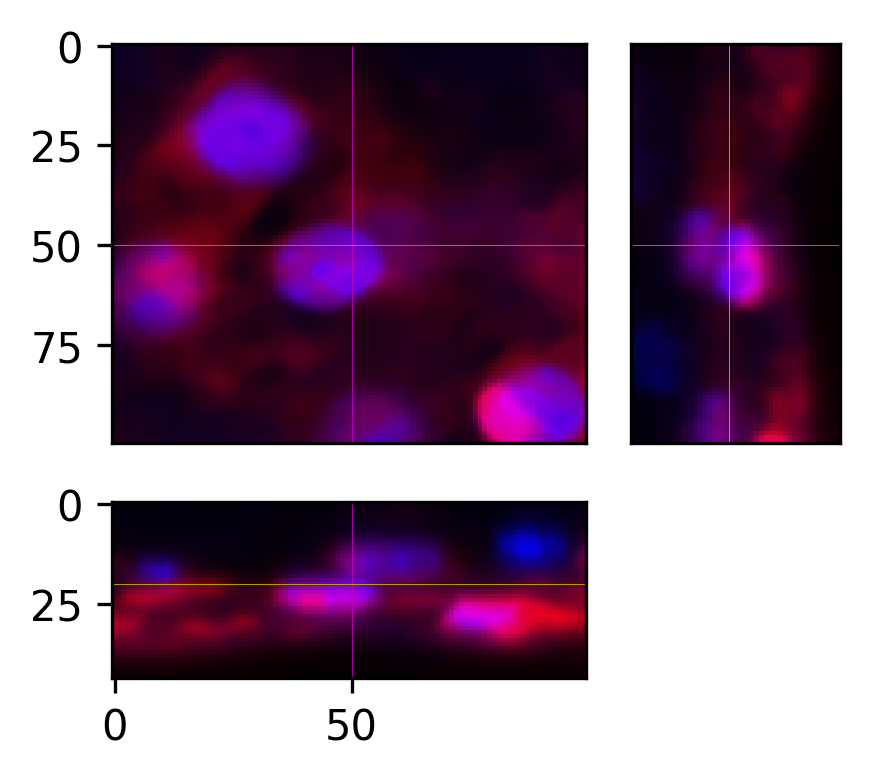

In [18]:
tiff_data_raw = tifffile.imread(curr_tif)
tiff_data = tiff_data_raw.copy()
tiff_format = 'zcyx'
print(tiff_data.shape)
tiff_data = ski.filters.gaussian(tiff_data, sigma=[1,1,1],mode='reflect',truncate = 4,channel_axis=1)
tiff_data = med_filt_stack(tiff_data,5)
print(tiff_data.shape)
tiff_data = norm_channels(tiff_data,'zcyx',clip=True)
tiff_data = tiff_data[:,[3,0,2],:,:]
print(tiff_data.shape)
tiff_data[:,1,:,:]=0

rgb_stack = tiff_data.transpose(0,2,3,1)*225
rgb_stack[rgb_stack<0]=0
rgb_stack[rgb_stack>255]=255
rgb_stack=rgb_stack.astype('uint8')

_=plot_point_data_rgb(400,600,20,rgb_stack,figsize=(3,2.7),rad=50)




In [ ]:
rgb_stack.shape

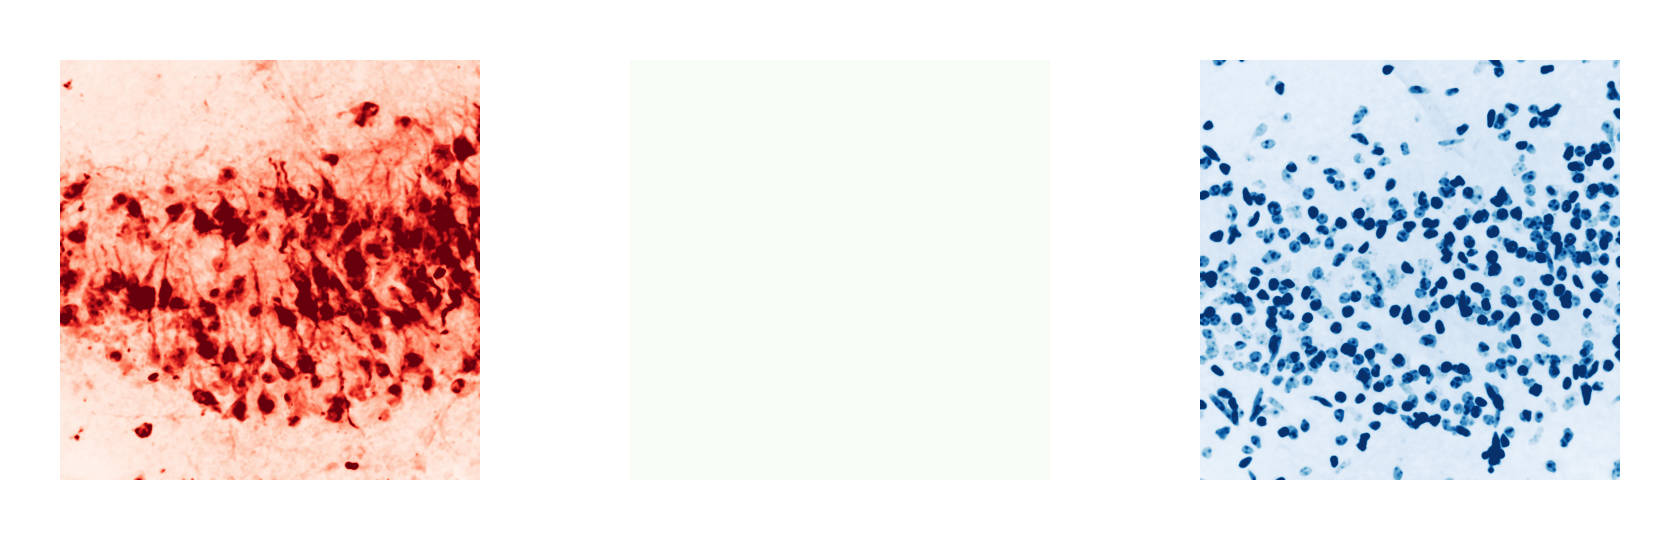

In [19]:
""" Display Split Projections """
num_c = tiff_data.shape[1]
fig,ax=plt.subplots(1,num_c,figsize=(num_c*1,1),dpi=600)
colors = ['Reds','Greens','Blues','gray']
for c in range(num_c):
    ax[c].imshow(np.max(tiff_data[:,c,:,:],axis=0), cmap=colors[c],vmin=0,vmax=1)
    ax[c].axis('off')
plt.tight_layout()

In [20]:
# colors = ['Reds','Greens','Blues','gray_r']
# for z in range(tiff_data.shape[0]):
#     num_c = tiff_data.shape[1]
#     fig,ax=plt.subplots(1,num_c,figsize=(num_c*1,1),dpi=300)
#     for c in range(num_c):
#         ax[c].imshow(tiff_data[z,c], cmap=colors[c],vmin=0,vmax=1)
#         ax[c].axis('off')
#     plt.tight_layout()
#     plt.show()

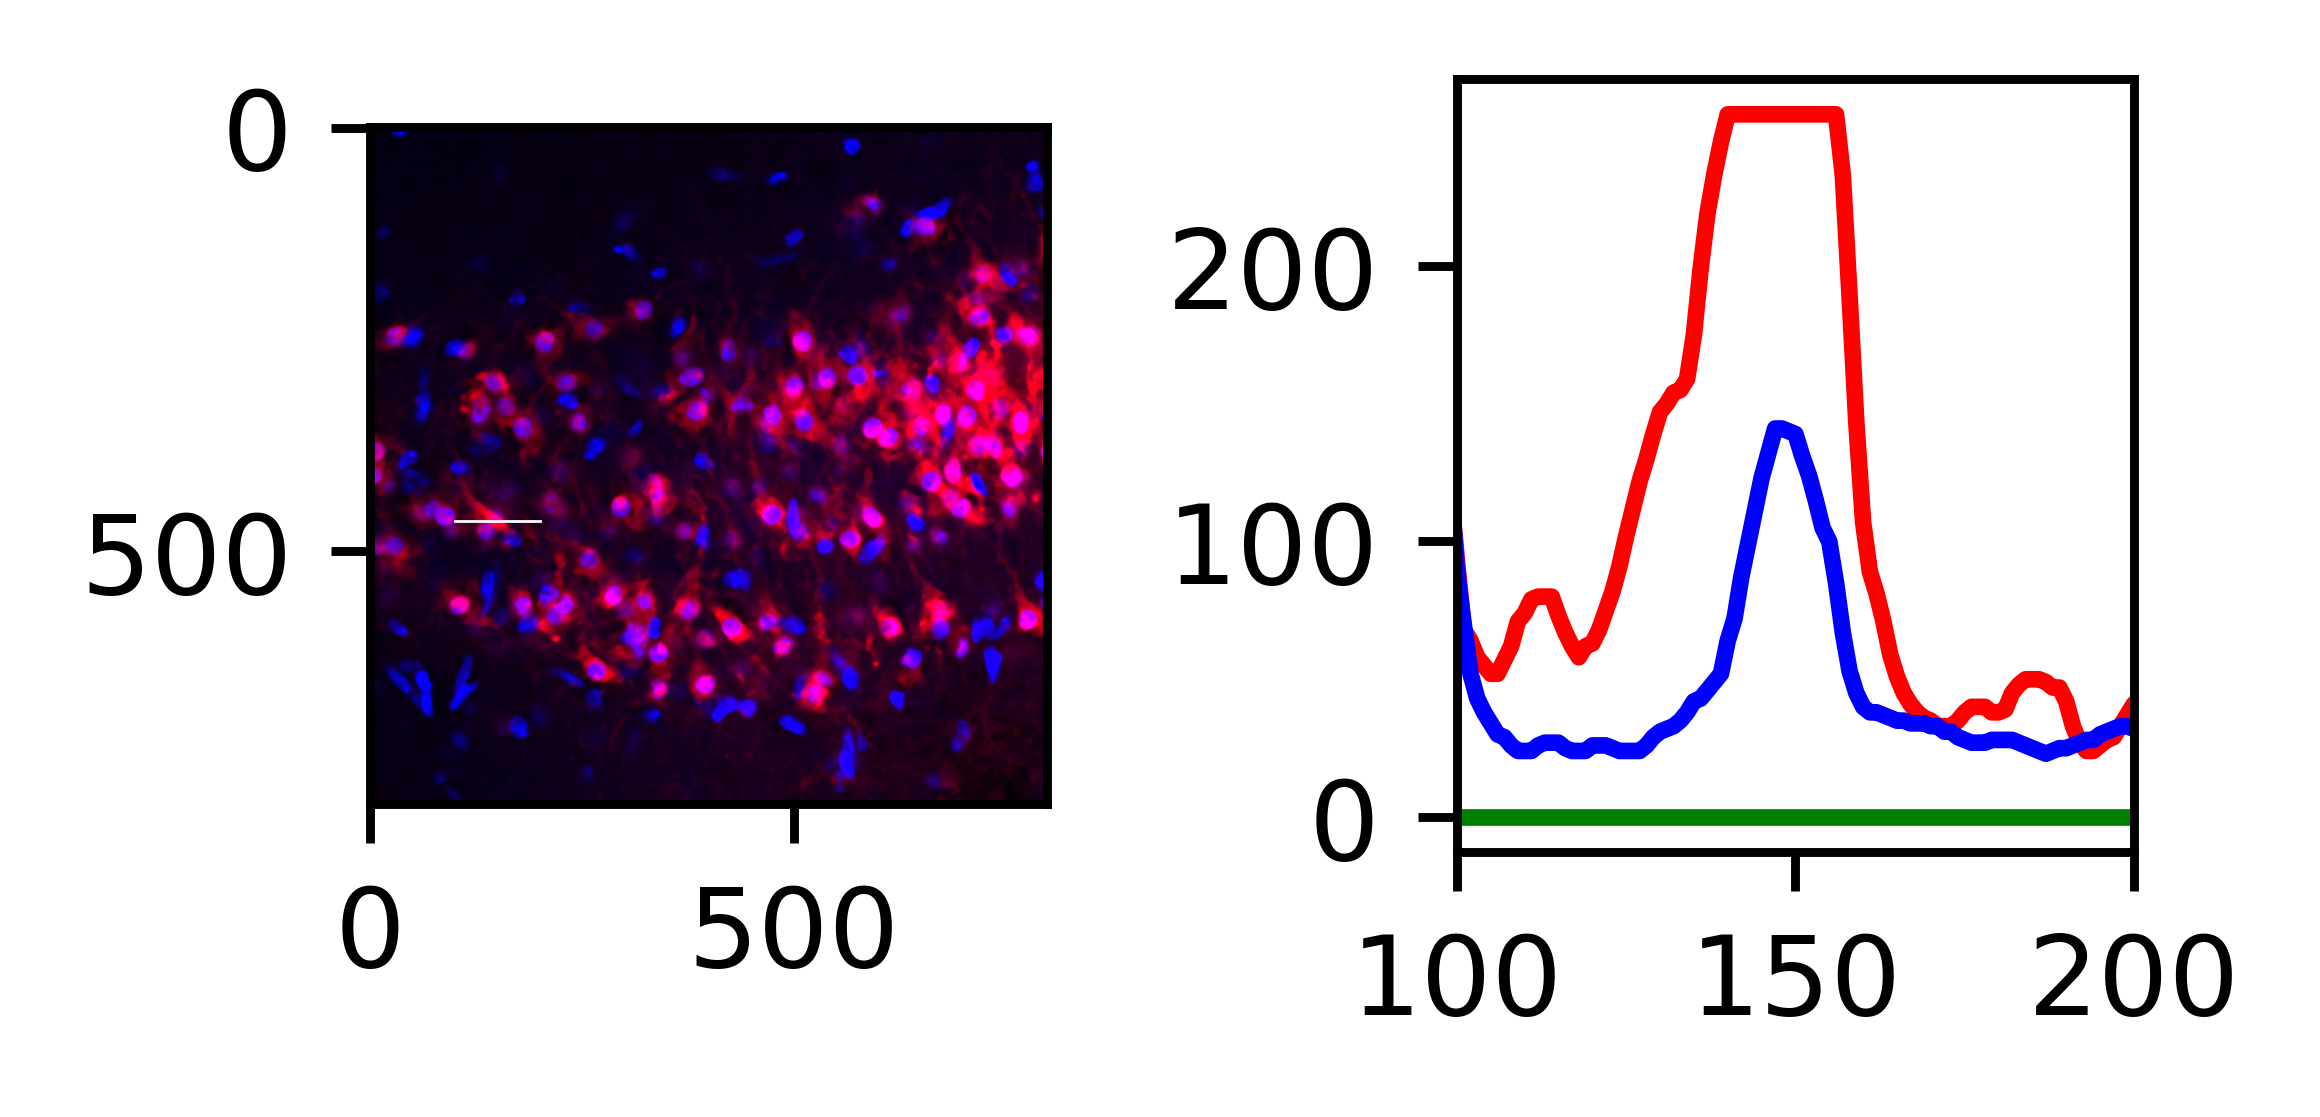

In [21]:
img_rgb = tiff_data.transpose([0,2,3,1])*255
img_rgb[img_rgb>255]=255
img_rgb[img_rgb<0]=0
img_rgb=img_rgb.astype('uint8')
fig,ax =plt.subplots(1,2,figsize=(3,1.5),dpi=800)
ax[0].imshow(img_rgb[27])
y=465
xb=[100,200]
ax[0].plot(xb,[y,y],'w',linewidth=.25)
ax[1].plot(img_rgb[27,y,:,0],color='r')
ax[1].plot(img_rgb[27,y,:,1],color='g')
ax[1].plot(img_rgb[27,y,:,2],color='b')
ax[1].set_xlim(xb)
plt.tight_layout()

In [133]:
zi = 35
cell_diam = 30
nuc_diam = None
cell_channel = 1
nuclear_channel = 0
channel_axis = 3

could not estimate diameter, does not work on non-2D images


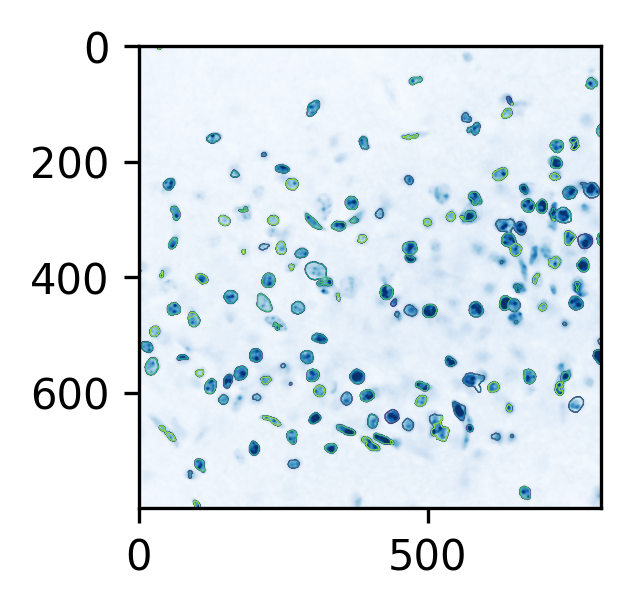

In [27]:
""" Define Nuclear Model """
nuclear_model = models.Cellpose(model_type='nuclei')
(nuclear_masks, _, _, _) =  nuclear_model.eval(img_rgb, channels=[nuclear_channel, 0], channel_axis = channel_axis, diameter=nuc_diam, do_3D=True) # ,stitch_threshold=0.02

fig,ax=plt.subplots(1,figsize=(2,2),dpi=300)
plt.imshow(img_rgb[20,:,:,2],cmap='Blues')
plt.contour(nuclear_masks[20,:,:],linewidths=.2)


In [152]:
cell_diam

30

nuclear_channel 0
cell_channel 1


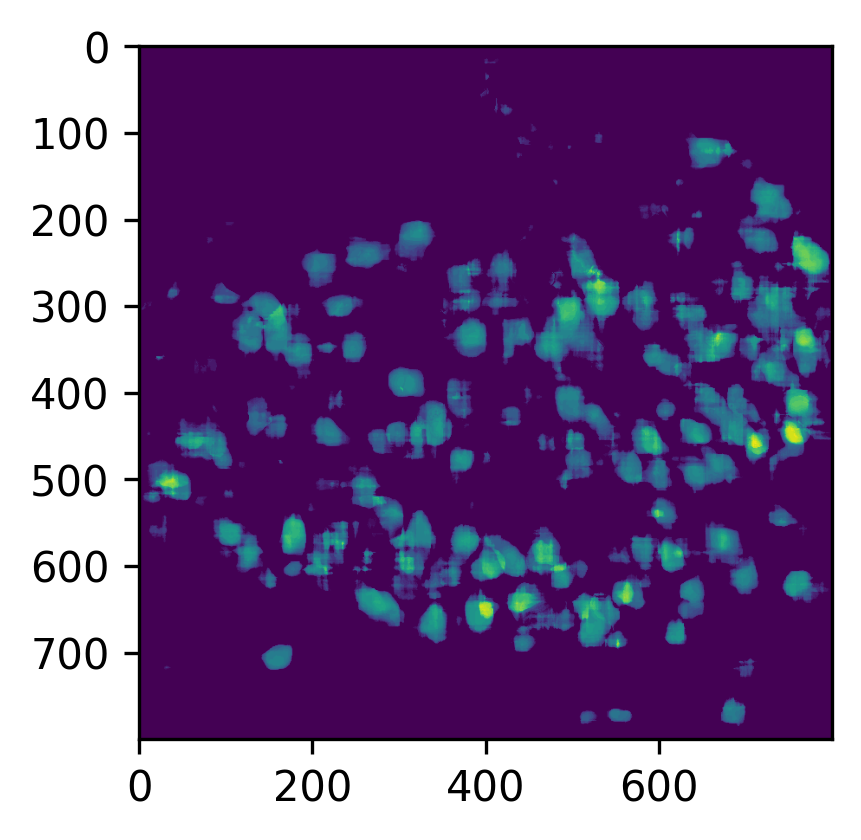

In [267]:
""" Define Cell Model """
cell_diam=40
cell_model = models.Cellpose(model_type='cyto3')
print('nuclear_channel',nuclear_channel)
print('cell_channel',cell_channel)
(cell_masks, flows, styles, diams) =  cell_model.eval(img_rgb, channels=[cell_channel, nuclear_channel], channel_axis = channel_axis, diameter=cell_diam, do_3D=True) # ,stitch_threshold=0.02, diameter=diam,
fig,ax=plt.subplots(1,figsize=(3,3),dpi=300)
plt.imshow(np.sum(masks>0,axis=0))

In [268]:
def no_edges(masks):
    masks_og = masks.copy()
    planes = [masks[0,:,:],
              masks[-1,:,:],
              masks[:,0,:],
              masks[:,-1,:],
              masks[:,:,0],
              masks[:,:,-1]]

    for p in planes:
        del_ids = np.unique(p)
        for id in del_ids:
            masks[masks==id] = 0
    return masks, masks_og

cell_masks, cell_masks_og = no_edges(cell_masks)

In [269]:
nuc_ids = np.unique(nuclear_masks)
cell_ids = np.unique(cell_masks)
nuc_ids = nuc_ids[nuc_ids>0]
cell_ids = cell_ids[cell_ids>0]
sizes, edges = np.histogram(cell_masks.flatten(),bins=np.concatenate([cell_ids,[np.max(cell_ids+1)]]))
cell_df = pd.DataFrame({'cell_ids':cell_ids,'nuc_ids':[list()]*len(cell_ids),'size_vxl':sizes}).set_index('cell_ids')
for c in cell_df.index:
    nucs = nuclear_masks[cell_masks==c]
    nucs = nucs[nucs>0]
    cell_df.at[c,'nuc_ids']=np.unique(nucs)
multi_nuc=[np.prod(np.shape(ni))>1 for ni in cell_df['nuc_ids']]
cell_df['multi_nuc']=multi_nuc
cell_df = cell_df[~cell_df['multi_nuc']]

no_nucs =[np.prod(np.shape(ni))<1 for ni in cell_df['nuc_ids']]
cell_df['no_nucs']=no_nucs
cell_df = cell_df[~cell_df['no_nucs']]
display(cell_df.head(500))

,nuc_ids,size_vxl,multi_nuc,no_nucs
cell_ids,,,,
5,53,3637,False,False
6,72,5558,False,False
16,183,319,False,False
18,183,902,False,False
21,155,83,False,False
...,...,...,...,...
536,592,28,False,False
538,452,52,False,False
540,561,31,False,False


In [280]:
filt_mask=np.zeros_like(cell_masks)
for cell in cell_df.index:
    filt_mask[cell_masks==cell]=cell

0.0 16182.0


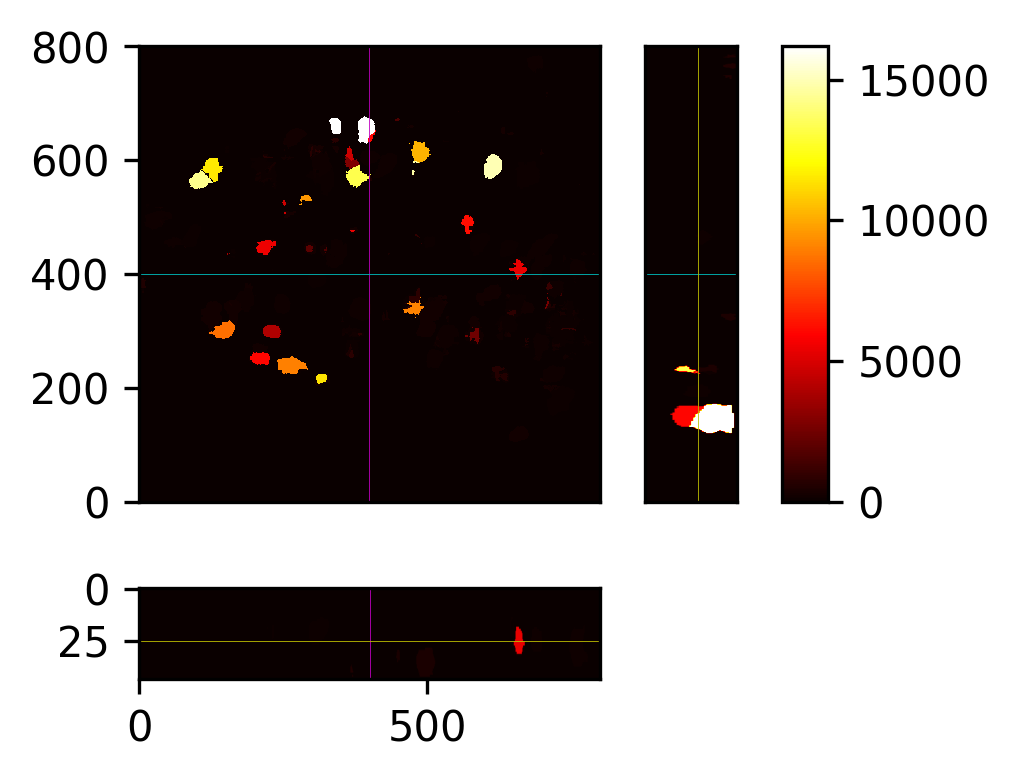

In [271]:
size_mask=masks.copy()
for c in cell_df.index:
    size_mask[filt_mask==c]=cell_df.loc[c,'size_vxl']

fi,ax,cbh = plot_point_data_pcol(400,400,25,size_mask,figsize=(3.5,2.7),cmap='hot')
tifffile.imwrite('./size_mask.tif',size_mask)

(44, 800, 800, 3) 340 420


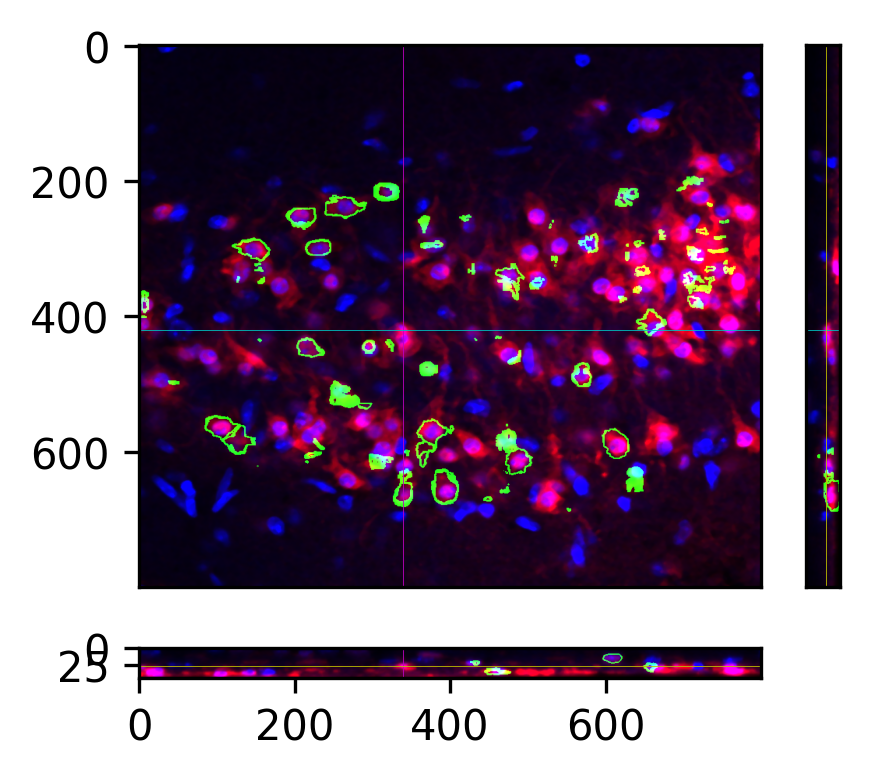

In [272]:
""" Mark Edges """
edges = ski.filters.sobel(filt_mask)
is_border = (edges-np.mean(edges)) > np.std(edges)*.9
rgb_borders = img_rgb.copy()
rgb_borders[:,:,:,1] = is_border*255
plot_point_data_rgb(340,420,26,rgb_borders,figsize=(3,2.7))
tifffile.imwrite('./rgb_borders.tif',rgb_borders)

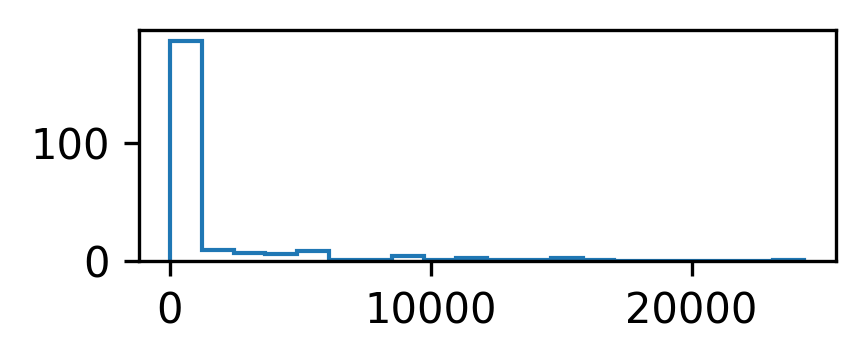

In [281]:
# size_bins = np.logspace(np.log10(np.min(sizes_um)),np.log10(np.max(sizes_um)),num=30,base=10)
counts,size_bins = np.histogram(cell_df['size_vxl'],bins=20)
fig,ax=plt.subplots(1,figsize=(3,1),dpi=300)
ax.stairs(counts,size_bins)
# ax.set_xscale('log')
# kinda_big = 100
# ax.axvline(kinda_big,color='k',ls=':')

0.0 5.0990195135927845


(<Figure size 900x810 with 6 Axes>,
 array([<Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >, <Axes: >],
       dtype=object),
 <matplotlib.image.AxesImage at 0x1d0000ddd90>)

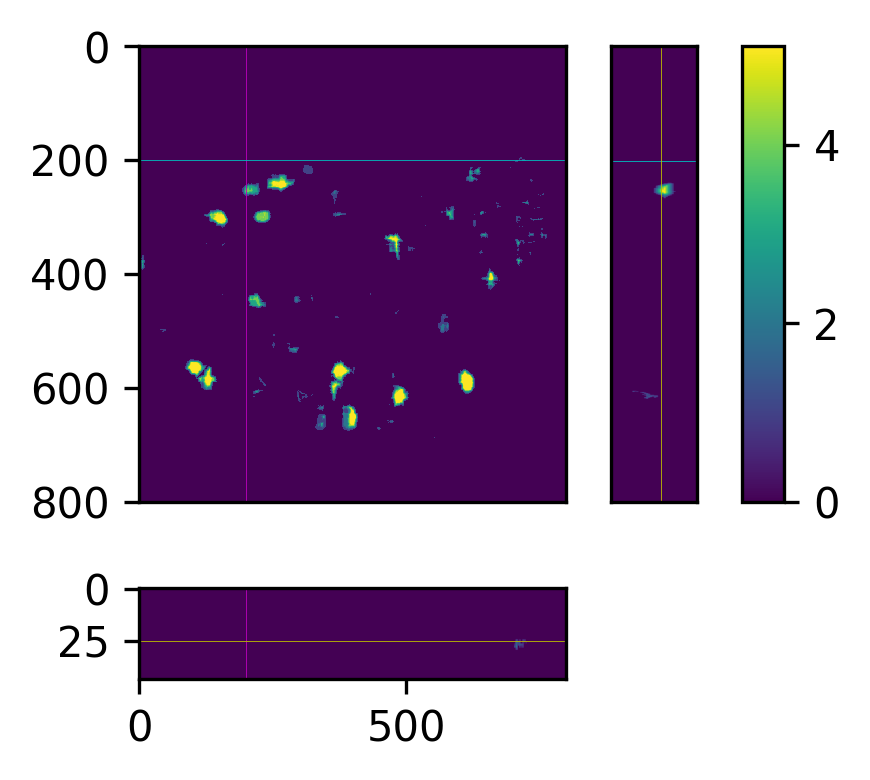

In [288]:

distance = sci.ndimage.distance_transform_edt((filt_mask>0)*1)
plot_point_data_pcol(200,200,25,distance,figsize=(3,2.7))

# labels = ski.segmentation.watershed(distance)
# plot_point_data_pcol(200,200,25,labels,figsize=(3,2.7))

In [290]:
def nd_feret(mask,scalars=None):
    if scalars is None:
        scalars=np.ones_like(mask.shape)
    n_coords=np.where(mask)
    feret_diams = list()
    for s, coord in zip(scalars,n_coords):
        diam = np.max(coord)-np.min(coord)
        feret_diams.append(diam*s)
    return feret_diams


In [291]:
cell_df['max_dist']=np.nan
cell_df['feret_d']=np.nan
cell_df['feret_d']= cell_df['feret_d'].astype(object)
for cell in cell_df.index:
    cell_df.at[cell,'max_dist']=np.max(distance[filt_mask==cell])
    cell_df.at[cell,'feret_d'] = nd_feret(filt_mask==cell) #,scalars=voxel_size_um[[2,0,1]]
display(cell_df.head(500))

,nuc_ids,size_vxl,multi_nuc,no_nucs,max_dist,feret_d,prod_f,fill
cell_ids,,,,,,,,
5,53,3637,False,False,5.099020,"[11, 24, 37]",9768,0.372338
6,72,5558,False,False,6.708204,"[16, 31, 29]",14384,0.386402
16,183,319,False,False,2.236068,"[9, 22, 30]",5940,0.053704
18,183,902,False,False,3.162278,"[8, 21, 31]",5208,0.173195
21,155,83,False,False,1.000000,"[7, 16, 9]",1008,0.082341
...,...,...,...,...,...,...,...,...
536,592,28,False,False,1.414214,"[2, 3, 4]",24,1.166667
538,452,52,False,False,1.732051,"[2, 6, 10]",120,0.433333
540,561,31,False,False,1.414214,"[4, 7, 2]",56,0.553571


,nuc_ids,size_vxl,multi_nuc,no_nucs,max_dist,feret_d,prod_f,fill
cell_ids,,,,,,,,
5,53,3637,False,False,5.099020,"[11, 24, 37]",9768,0.372338
6,72,5558,False,False,6.708204,"[16, 31, 29]",14384,0.386402
16,183,319,False,False,2.236068,"[9, 22, 30]",5940,0.053704
18,183,902,False,False,3.162278,"[8, 21, 31]",5208,0.173195
21,155,83,False,False,1.000000,"[7, 16, 9]",1008,0.082341
...,...,...,...,...,...,...,...,...
536,592,28,False,False,1.414214,"[2, 3, 4]",24,1.166667
538,452,52,False,False,1.732051,"[2, 6, 10]",120,0.433333
540,561,31,False,False,1.414214,"[4, 7, 2]",56,0.553571


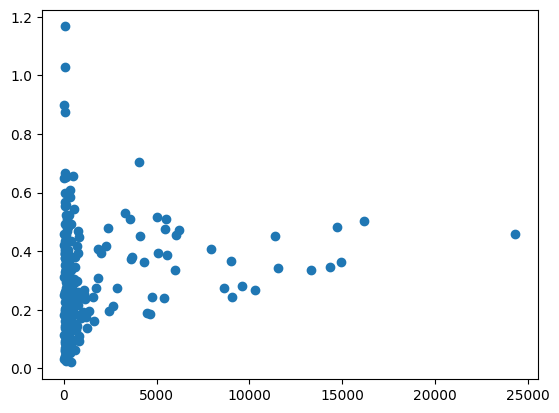

In [276]:
cell_df['prod_f']=[np.prod(fd) for fd in cell_df['feret_d'].values]
cell_df['fill'] = cell_df['size_vxl']/cell_df['prod_f']
display(cell_df.head(300))
plt.scatter(cell_df['size_vxl'],cell_df['fill'])

[10, 23, 33]


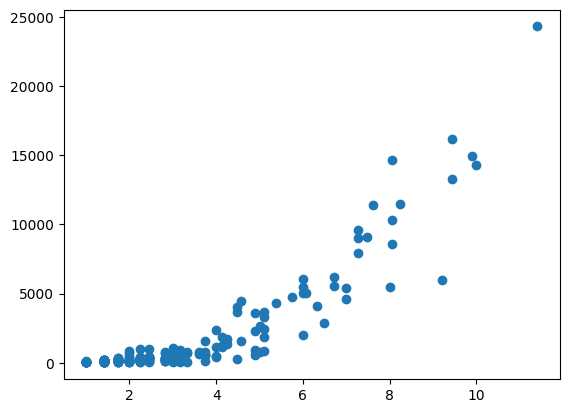

In [292]:
plt.scatter(cell_df['max_dist'],cell_df['size_vxl'])